# R68 G4 Capture Analysis
Looking at the capturing events from the R68 G4 simulation. Want to check total number of captures, the isotopic capture rates, and their spatial distribution.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Set up notebook and load some R68 constants (V, eps, etc.)
exec(open("nb_setup.py").read())#Is there a better way to do this?
from constants import *

../mplstyles
3.1.1
/data/chocula/mast/cdms/analysis/run068/R68_paper2019/mplstyles


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import h5py
warnings.resetwarnings()
import pandas as pd

In [4]:
f_wcap = h5py.File("data/R68_gdirect_testskim_stupidhighstat_wcap.h5","r")
data_wcap = f_wcap['geant4/hits']

In [5]:
#now make a dataframe with the restricted data
#Columns are:
cols=['EV', 'DT', 'TS', 'P', 'Type', 'E1', 'D3', 'PX3', 'PY3', 'PZ3', 'X3', 'Y3', 'Z3',
      'time3', 'PX1', 'PY1', 'PZ1', 'X1', 'Y1', 'Z1', 'time1', 'nCap']

sel_names=['EV', 'Type','E1', 'D3', 'X3', 'Y3', 'Z3', 'time3', 'time1', 'nCap']#Select these variables
sel=[cols.index(i) for i in sel_names]

wcap_data = data_wcap[:,sel]
wcap_dataframe = pd.DataFrame(data=wcap_data, columns=sel_names)

#need unique event numbers in case of (rare) duplicate 'EV's
wcap_evnew=np.cumsum(np.diff(wcap_data[:,0],prepend=wcap_data[0,0]).astype(bool).astype(float))
wcap_dataframe.insert(0,'EVnew',wcap_evnew)

In [6]:
#Count the total number of captures
nCapTot=wcap_dataframe.nCap[wcap_dataframe.nCap==1].count()
print(nCapTot)

14844


In [7]:
#How to identify which isotope it captured on?
#Looks like the neutron (2112) is captured at time3 and the capturing nucleus (XX014) starts at time1 which matches the neutron's time3
#So, in each event, we find the capturing neutron's time3, and record the Type of nucleus that starts at that same time
wcap_dataframe[wcap_dataframe.EVnew==0].sort_values(['EVnew','time1'])

,EVnew,EV,Type,E1,D3,X3,Y3,Z3,time3,time1,nCap
0,0.0,8881523.0,2112.0,9.380187e-09,0.000000,24.918547,-40.247311,34.701996,246358.1495,243540.8304,1.0
1,0.0,8881523.0,29014.0,5.590713e-04,0.000559,24.918547,-40.247311,34.701996,246358.1495,246358.1495,0.0
2,0.0,8881523.0,29014.0,0.000000e+00,0.000000,24.918547,-40.247311,34.701996,246358.1495,246358.1495,0.0
3,0.0,8881523.0,22.0,2.092898e+00,0.000000,6.052525,-29.037850,30.490964,246358.2241,246358.1495,0.0
6,0.0,8881523.0,22.0,2.425703e+00,0.000000,27.336894,-41.865191,35.440883,246358.1595,246358.1495,0.0
7,0.0,8881523.0,22.0,5.106704e+00,0.000000,26.074760,-42.662711,35.591682,246358.1589,246358.1495,0.0
4,0.0,8881523.0,22.0,2.071422e+00,0.000000,-49.187200,-1.025585,20.343552,246358.4334,246358.2241,0.0
5,0.0,8881523.0,11.0,2.147523e-02,0.021475,6.053185,-29.036376,30.490265,246358.2241,246358.2241,0.0


In [8]:
a=wcap_dataframe.groupby(['EVnew']).agg({'EVnew':list,'time3':list,'nCap':list,'Type':list})

In [9]:
a

,EVnew,time3,nCap,Type
EVnew,,,,
0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[246358.1495, 246358.1495, 246358.1495, 246358...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[2112.0, 29014.0, 29014.0, 22.0, 22.0, 11.0, 2..."
1.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1163090.053, 1167309.79, 1167309.79, 89669782...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2112.0, 2112.0, 31014.0, 31014.0, 11.0, 11.0,..."
2.0,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[169013.3769, 172281.8843, 201072.2156, 201072...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2112.0, 2112.0, 2112.0, 29014.0, 29014.0, 280..."
3.0,"[3.0, 3.0, 3.0, 3.0, 3.0]","[314310.7885, 314310.7885, 314310.7885, 314310...","[1.0, 0.0, 0.0, 0.0, 0.0]","[2112.0, 29014.0, 29014.0, 22.0, 22.0]"
4.0,"[4.0, 4.0, 4.0, 4.0, 4.0]","[221367.3292, 221367.3292, 221367.3292, 221367...","[1.0, 0.0, 0.0, 0.0, 0.0]","[2112.0, 29014.0, 29014.0, 22.0, 22.0]"
...,...,...,...,...
14839.0,"[14839.0, 14839.0, 14839.0, 14839.0, 14839.0, ...","[214760.1345, 227228.2031, 227228.2031, 227228...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2112.0, 2112.0, 29014.0, 29014.0, 22.0, 22.0,..."
14840.0,"[14840.0, 14840.0, 14840.0, 14840.0, 14840.0, ...","[362404.0009, 365118.969, 365118.969, 365118.9...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2112.0, 2112.0, 29014.0, 29014.0, 29014.0, 29..."
14841.0,"[14841.0, 14841.0, 14841.0, 14841.0, 14841.0, ...","[162833.8909, 163219.4115, 163219.4115, 163219...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2112.0, 2112.0, 29014.0, 29014.0, 28014.0, 28..."


In [10]:
nuclei=[]

for EVnewi, group in wcap_dataframe.groupby(['EVnew']):
    t3cap=(group[group.nCap==1].time3).values[0]
    
    nuc=group[group.time1==t3cap].Type.max()
    nuclei.append(nuc)
    
    #if(EVnewi>5):
    #    break

In [11]:
from collections import Counter
unique, counts = np.unique(nuclei, return_counts=True)
cap_counts=dict(zip(unique, counts))
print(cap_counts)

{25012.0: 107, 26012.0: 6, 28013.0: 226, 29013.0: 5, 29014.0: 13712, 30014.0: 470, 31014.0: 318}


In [12]:
#Taken from calculations of abundance and capture cross section here:
#https://zzz.physics.umn.edu/cdms/doku.php?id=cdms:k100:run_summary:run_68:run_68_n125:full_signal_fit
R28_th=0.161
R29_th=0.031
R30_th=0.026
R_th=R28_th+R29_th+R30_th

R28_g4=cap_counts[29014]
R29_g4=cap_counts[30014]
R30_g4=cap_counts[31014]
R_g4=R28_g4+R29_g4+R30_g4

print('Theory:\t{0:.3f}, {1:.3f}, {2:.3f}'.format(R28_th/R_th, R29_th/R_th, R30_th/R_th))
print('G4:\t{0:.3f}, {1:.3f}, {2:.3f}'.format(R28_g4/R_g4, R29_g4/R_g4, R30_g4/R_g4))

Theory:	0.739, 0.142, 0.119
G4:	0.946, 0.032, 0.022


In [13]:
cap_counts[31014]

318

In [14]:
wcap_dataframe.groupby(['Type']).groups.keys()

dict_keys([-12.0, -11.0, 11.0, 22.0, 2112.0, 2212.0, 4002.0, 25012.0, 26012.0, 28013.0, 28014.0, 29013.0, 29014.0, 30014.0, 31014.0, 31015.0])

Text(0.5, 0, 'Recoiling Nucleus')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


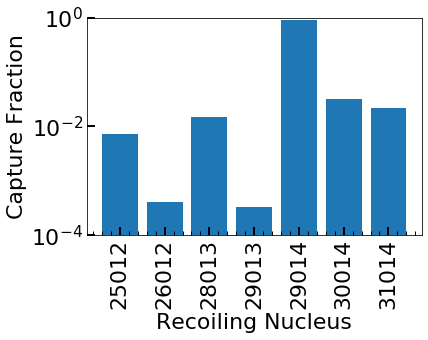

In [15]:
fig, ax=plt.subplots()

ax.bar(np.arange(len(counts)), counts/np.sum(counts), tick_label=unique.astype(int))

ax.set_xticklabels(unique.astype(int), rotation=90)
ax.set_yscale('log')
ax.set_ylim(1e-4,1)
ax.set_ylabel('Capture Fraction')
ax.set_xlabel('Recoiling Nucleus')

In [39]:
wcap_dataframe[wcap_dataframe.Type==4002]

,EVnew,EV,Type,E1,D3,X3,Y3,Z3,time3,time1,nCap
492,45.0,4055647.0,4002.0,2.494780,2.494780,-20.305512,-20.404958,34.546418,69.291959,69.291219,0.0
4312,370.0,8134983.0,4002.0,2.385733,2.385733,37.969355,12.855220,41.760418,110.687769,110.687056,0.0
6115,511.0,3433768.0,4002.0,3.454027,3.307190,-38.939161,-16.760422,32.268512,48.388161,48.387208,0.0
6116,511.0,3433768.0,4002.0,0.146837,0.146837,-38.938483,-16.760338,32.267749,48.388545,48.388161,0.0
8361,685.0,6559274.0,4002.0,3.190943,3.008935,-21.285361,16.775939,30.554182,49.028310,49.027398,0.0
...,...,...,...,...,...,...,...,...,...,...,...
166222,14795.0,7425571.0,4002.0,3.853631,3.266998,-31.369376,13.643249,28.913822,43.511031,43.510036,0.0
166223,14795.0,7425571.0,4002.0,0.586633,0.586633,-31.368435,13.641565,28.913908,43.511394,43.511031,0.0
166227,14796.0,8858825.0,4002.0,2.001461,2.001461,24.990426,7.881851,22.713543,100.481172,100.480556,0.0
166276,14803.0,6918208.0,4002.0,4.670846,3.196616,6.479304,14.146398,36.710320,50.625699,50.624662,0.0


Text(0.5, 0, 'D3 [eV]')

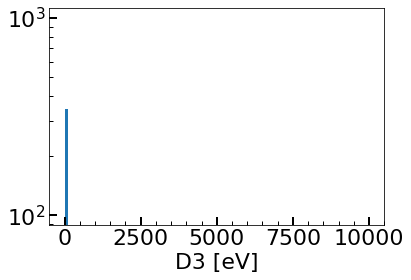

In [47]:
c_nalpha=(wcap_dataframe.Type%1000==12) | (wcap_dataframe.Type%1000==13) | (wcap_dataframe.Type==4002)
plt.hist(1e6*wcap_dataframe[c_nalpha].E1,bins=100,range=(0,10e3));
plt.yscale('log')
plt.xlabel('D3 [eV]')
#Cool, looks like those n-alpha interactions don't produce recoils in the ROI.

In [271]:
wcap_dataframe[wcap_dataframe.EVnew==14795].sort_values(['EVnew','time1'])

,EVnew,EV,Type,E1,D3,X3,Y3,Z3,time3,time1,nCap
166219,14795.0,7425571.0,2112.0,6.913981,0.000000,-31.375445,13.655343,28.913046,43.510036,42.502351,1.0
166220,14795.0,7425571.0,25012.0,0.363464,0.363464,-31.376149,13.655614,28.913019,43.510486,43.510036,0.0
166222,14795.0,7425571.0,4002.0,3.853631,3.266998,-31.369376,13.643249,28.913822,43.511031,43.510036,0.0
166221,14795.0,7425571.0,25012.0,0.000000,0.000000,-31.376149,13.655614,28.913019,43.510486,43.510486,0.0
166223,14795.0,7425571.0,4002.0,0.586633,0.586633,-31.368435,13.641565,28.913908,43.511394,43.511031,0.0
